# 1. Install Dependencies and Setup

In [ ]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
# !pip list

Download all images yazan extension google resimlerden bütün resimleri zip olarak indirmek için kullanabilirsin.
Denemeler yaparken ve veriye ihtiyacın oldugunda oldukça kullnışlı bir araç oluyor.
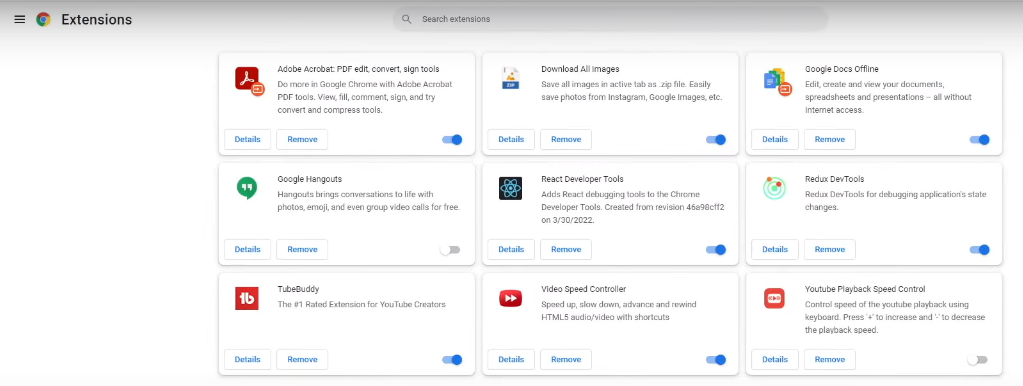
Bu aracı kullanırken 10 KB altındaki veriler kucuk olcagından resimleri indirdikten sonra o resimleri siliyoruz. Ayrıca web uzantılı resim olmayan dosyalar da indirileceginden onlardan da el yoluyla kurtuluyoruz.

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
# Bütün Gpu rami kullanıyor. Onun Önüne geçmek için.
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [8]:
import cv2
import imghdr

C:\Users\Eren\AppData\Local\Temp\ipykernel_30416\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
data_dir = 'data' 

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
# ilk for dongusu butun data klasoru icerisinde dolasarak baska klasorleri bulacak
for image_class in os.listdir(data_dir): 
    # 2. for dongusu data icerisindeki bulunan diger klasorun icerisindeki dosyaları bize verecek.
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # bizler bu dosyaları yani bizim bu ornegimiz icin resimleri path'e cevirdik.
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [1]:
# Normal şartlarda pyplot RGB bekliyor renk kanalını ancak openCV BGR okuyor. 
# Biz yukarıda dosyayı openCV ile okudugumuzdan plotlib kullanacakken donusturme islemi yaparak kullanmalıyız.
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 3. Load Data

In [ ]:
# TensorFlow bizlere data pipeline'ı oluşturmamıza izin veren Dataset API'ı sunuyor
# bu sayade bütün datasetini memory'ye yukelemeden istedigimiz işlemleri gerceklestirebiliyoruz.

# tf.data.Dataset??

In [2]:
data = tf.keras.utils.image_dataset_from_directory??

Object `tf.keras.utils.image_dataset_from_directory` not found.


In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
# Bu fonksyion bizi için resimleri scale etmek dahil bir çok preprocess işlemini gerçekleştiriyor.
# Eğerki fonksiyonun paramerelerine bakmak istersen ki yukarı ?? fonksiyonun sonuna 2 tane soru isareti koyarak bunu yapabilyiorsun
# fonksiyonun parametrelerine bak ve istedigin gibi kullan.
data = tf.keras.utils.image_dataset_from_directory('data')

# Bu data memory'ye yuklenmis bir array veya herhangi bir dataset'i degil
# Ondan tek tek veya istenilen miktardan veri cekmeni bekleyen bir pipeline. Bir iterator gibi

Found 171 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
# batch = data_iterator.next()

In [17]:
# Burada batch 2 tane şeyden oluşmakta birincisi numpy array olarak resimelrden ikincisi ise bu resimlerin labellarından
# batch[0].shape

(32, 256, 256, 3)

In [18]:
# Batch'in bu ikinci parametresi label ancak bu label islemini nasıl yapıyor: 
# ust klasor olan data klasorunun altında olan diger 2 sınıf ki bunlar happy ve sad. Bunları label 0 ve label 1 olarak isaretliyor
# fotografi hangi klasorden cektiyse label'ıda ona göre veriyor.

# Class-0 = Happy PEOPLE
# Class-1 = Sad PEOPLE
# batch[1]

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0])

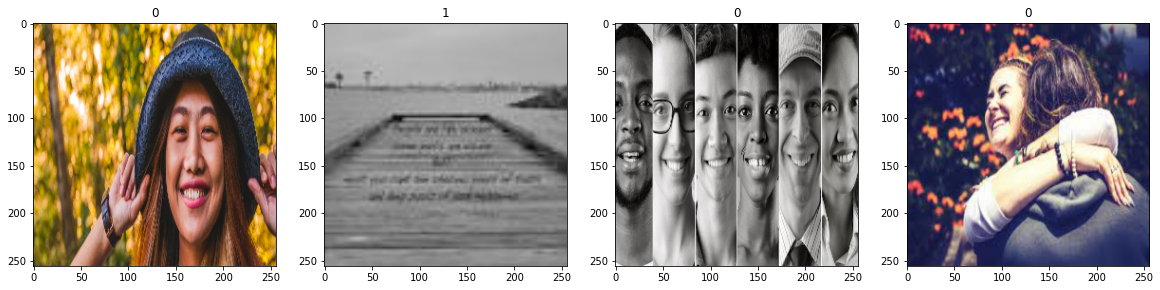

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# Class-0 = Happy PEOPLE
# Class-1 = Sad PEOPLE

# 4. Scale Data

In [13]:
# Burada 255'e bolecek slace islemini gerceklstirdik 
# renk kanalı 3 olan (RGB) bu resimlerin renk kanallarındaki sayı aralıkları 0-255 oldugundan ve bizim onalrı 0-1 arasına 
# indirgersek daha hızlı calisacagimizdan doalyı bu resimelri scale ettik.
# Burada her bir datapipeline'ından çektiktens orna bu silemi uygulamamak icin pipeline'ın hepsine uygulanması icin 
# map fonksiyonu aracılı ile lambda expresison oalrakv eridigimiz bu fonksiyonu data seti icerisindeki butun fonksiyonalra uygulattırdık.

# Bu islem pipeline'dan resimler cekilirken uygulanıyor o yüzden isimiz cok daha kolaylasıyor.

# Buradaki x verilerimiz yani array'imiz olacak iken y ise bu resimlerin labelları olacak.
data = data.map(lambda x,y: (x/255, y))

In [19]:
data.as_numpy_iterator().next()

(array([[[[231.       , 228.       , 223.       ],
          [232.       , 229.       , 224.       ],
          [233.16968  , 230.16968  , 225.16968  ],
          ...,
          [221.       , 214.       , 208.       ],
          [219.1875   , 210.1875   , 203.1875   ],
          [217.       , 206.125    , 200.0625   ]],
 
         [[231.0393   , 228.0393   , 223.0393   ],
          [232.69849  , 229.69849  , 224.69849  ],
          [233.3125   , 230.3125   , 225.3125   ],
          ...,
          [221.       , 214.       , 208.       ],
          [219.1875   , 210.1875   , 203.1875   ],
          [217.       , 206.125    , 200.0625   ]],
 
         [[232.04468  , 229.04468  , 224.04468  ],
          [233.13403  , 230.13403  , 225.13403  ],
          [234.3125   , 231.3125   , 226.3125   ],
          ...,
          [221.       , 214.       , 208.       ],
          [219.1875   , 210.1875   , 203.1875   ],
          [217.       , 206.125    , 200.0625   ]],
 
         ...,
 
         [[ 

# 5. Split Data

In [40]:
# Burada len(data) bizlere batch içerisinde 32 tane oldugundan totalde kac batch dondurecek onu veriyor.
print(len(data))

# Total batch sayısına göre burada train test ve valid btach sayiisni duzenlememiz gerek
train_size = int(len(data)*.7)
val_size = int(len(data)*.1)+1
test_size = int(len(data)*.1)+1

6


In [41]:
val_size

1

In [42]:
# Burada ise take fonksiyonu data'da isnilen veri kısmının yeni bir tf.data objesine donusturulmesi icin kullanılıyor
# skip ise asıl orjinal veride istenilen kadar veri atlanarak ondan sonra gelen veriye ulasmamıza yarıyor.
# Burada verilen sayıların herbir image degilde batch tarafından cekilen sayının ( 32 ) 1'e karsılık geldiği ornegin oraya
# 4 yazarsam 4*Batch sayısı kadar fotograflarda ileri gidecigini unutma
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [30]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
from tensorflow.keras.models import Sequential
# Maxpooling2D ,layer su ise yarıyor:
# Conv2d2den sonra olusan yeni matrisin de region'a gore en buyuk degerini alarak bir kez daha boyut indirgenmesinde ise yarıyor.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
# Bu parametrenin içerisine de eklemek istedigin layerları parametre olarak vererek ekleme islemini gerceklestirebilirsin.
# Bazen bu parametre olarak verilme yontemi bazen add methodunu kullanarka vereme sekli kullanılyıorus
model = Sequential()

In [33]:
# Ne zaman bir model gelistirirsen gelistir ilk layer inputshape alan bir layer olmak zorunda.
# Asagidaki 16 filter sayisina denk geiyor yani 16 tane filtre olacak
# (3,3) filtrenin boyutunu soyluyor
# 1 ise stride'ı temsil ediyor. Yani herbir filtrenin uygulanma adımında filtrenin kac adım atlayacagını soyluyor.
# biz burada stride 1 vererek filtreye bir bir ilerle demiş olduk.
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Her bir Conv2D layer'ı giriş inputu olarak verdiğimiz data'yı filter'ın boyutu kadar düşürecek
# Burada (3,3)'lük bir filter kullandığımız için 2'şer olarak kenarladan bir daralma olacak.
# Maxpooling ise region olarak tarama yaprak asıl olan verinin boyutunu yarıya dusuruyor.
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [36]:
logdir='logs'

In [37]:
# Eğitim sırasında log'lama için callback cagiriyor oalcagız.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 6s 586ms/step - loss: 441.8668 - accuracy: 0.5234
Epoch 2/20
4/4 [==============================] - 4s 565ms/step - loss: 100.1204 - accuracy: 0.4766
Epoch 3/20
4/4 [==============================] - 5s 732ms/step - loss: 34.3262 - accuracy: 0.6172
Epoch 4/20
4/4 [==============================] - 4s 608ms/step - loss: 2.6871 - accuracy: 0.7500
Epoch 5/20
4/4 [==============================] - 4s 620ms/step - loss: 1.2038 - accuracy: 0.7109
Epoch 6/20
4/4 [==============================] - 5s 678ms/step - loss: 0.8687 - accuracy: 0.7969
Epoch 7/20
4/4 [==============================] - 4s 572ms/step - loss: 0.3712 - accuracy: 0.8828
Epoch 8/20
4/4 [==============================] - 4s 571ms/step - loss: 0.3228 - accuracy: 0.9219
Epoch 9/20
4/4 [==============================] - 5s 664ms/step - loss: 0.1834 - accuracy: 0.9297
Epoch 10/20
4/4 [==============================] - 4s 576ms/step - loss: 0.1481 - accuracy: 0.9531
Epoch 11/20
4/

# 8. Plot Performance

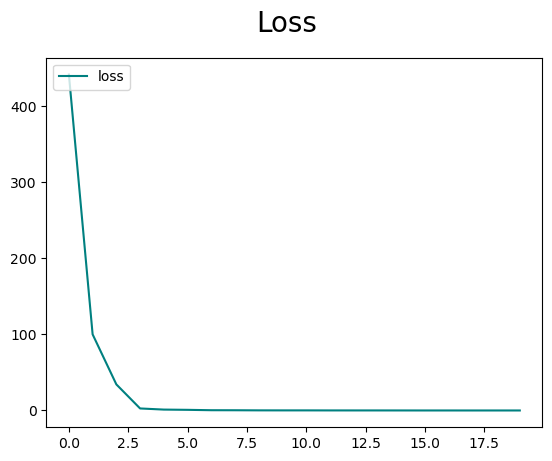

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
#plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

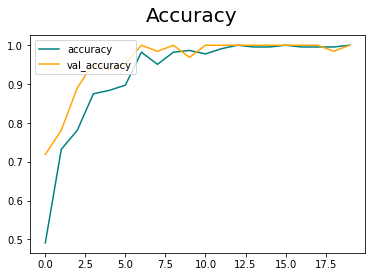

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [45]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 244ms/step


In [47]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.85714287, shape=(), dtype=float32) tf.Tensor(0.90909094, shape=(), dtype=float32)


# 10. Test

In [33]:
import cv2

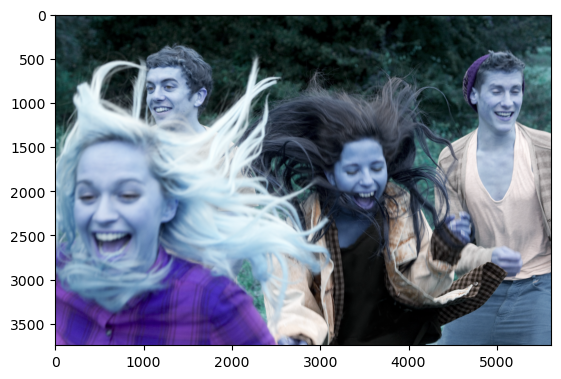

In [49]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

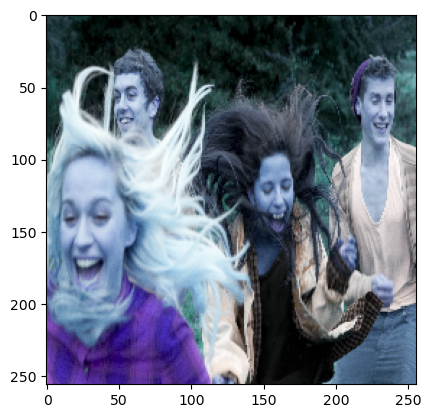

In [51]:
# Unutma bizler modelimize veirleri verirken 256,256 formatında vermiştik , yeni bir data verirken de ilk önce preprocess'den geçrimek gerek

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [52]:
# Expand_dims ile bizden bir batch size kadar veri bekleyen modelimize batch size değil ama batch boyutlarında yani: 
# (1,256,256,3) olacak şekilde 4 boytlu bir veri gonderdik
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


In [53]:
yhat

array([[0.50757813]], dtype=float32)

In [54]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [55]:
from tensorflow.keras.models import load_model

In [62]:
# Artık .h5 formatı tarihe karışmış bu yüzden farklı bir formatta kaydetmemzi gerekiyor. 
# sonuan uzantı vermeden yapınca geri kalan işlemi o hallediyor.
model.save(os.path.join('models','imageclassifier'))

INFO:tensorflow:Assets written to: models\imageclassifier\assets


INFO:tensorflow:Assets written to: models\imageclassifier\assets


In [64]:
new_model = load_model(os.path.join('models','imageclassifier'))

In [65]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 114ms/step


array([[0.50757813]], dtype=float32)